In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt("kmeans.txt", delimiter=" ")


In [3]:
model = KMeans(n_clusters= 4 )
model.fit(data)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


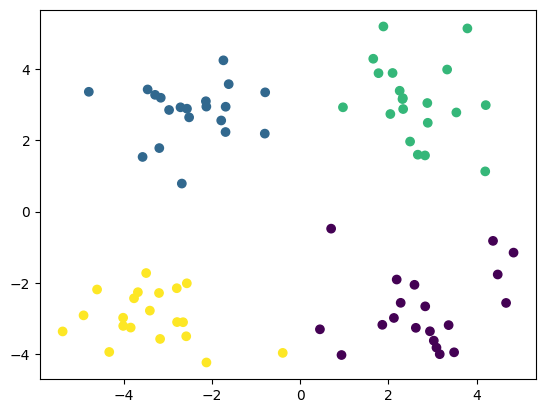

In [ ]:
plt.scatter(data[:,0], data[:,1], c=model.labels_) # 繪製資料點並根據群集標籤著色, c=model.labels_ # 顏色參數
plt.show()


In [4]:

centers = model.cluster_centers_ # 質心的座標
print(centers)
print(model.inertia_)# 資料點與所屬集群的質心距離平方和
print(model.n_iter_)# 實際訓練的次數

[[ 2.80293085 -2.7315146 ]
 [-2.46154315  2.78737555]
 [ 2.6265299   3.10868015]
 [-3.38237045 -2.9473363 ]]
149.95430467642635
3


In [5]:

result = model.predict(data)
print(result)

[2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2
 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1
 0 3 2 1 0 3]


In [6]:
# 訓練資料每一點的類別，與predict函數回傳值一樣。
model.labels_

array([2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1,
       0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3,
       2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1,
       0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3], dtype=int32)

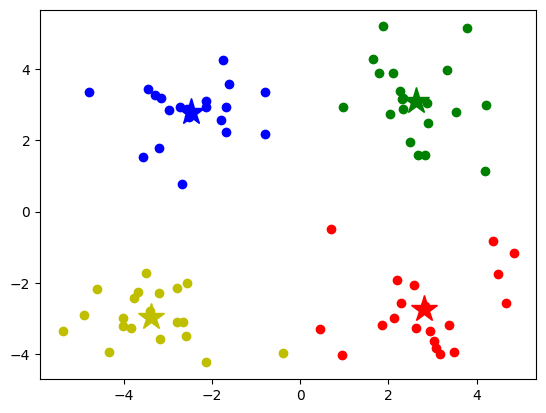

In [ ]:

mark = ['or', 'ob', 'og', 'oy'] # 繪製資料點的顏色
for i,d in enumerate(data):
    plt.plot(d[0], d[1], mark[result[i]]) # i 是資料點的索引, d是資料點


mark = ['*r', '*b', '*g', '*y'] # 繪製質心的顏色
for i,center in enumerate(centers):
    plt.plot(center[0],center[1], mark[i], markersize=20)
    
plt.show()

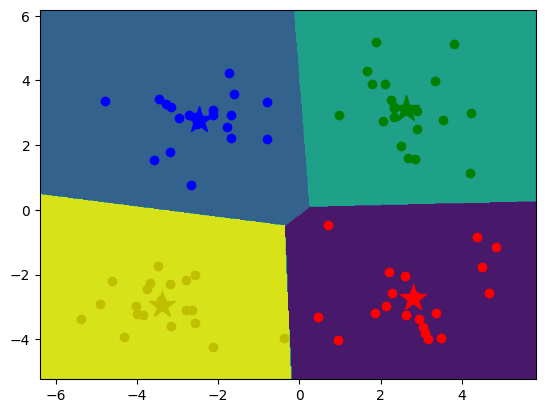

In [8]:
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1


xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = model.predict(np.c_[xx.ravel(), yy.ravel()])# ravel與flatten類似，可以將多維轉成一維。flatten不會改變原資料，ravel會改變
z = z.reshape(xx.shape)

cs = plt.contourf(xx, yy, z)

mark = ['or', 'ob', 'og', 'oy']
for i,d in enumerate(data):
    plt.plot(d[0], d[1], mark[result[i]])


mark = ['*r', '*b', '*g', '*y']
for i,center in enumerate(centers):
    plt.plot(center[0],center[1], mark[i], markersize=20)
    
plt.show()